<a href="https://colab.research.google.com/github/SergJohn/Crypto-Prediction-2022-Project/blob/main/LSTM/LSTM_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3 MB 46 kB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
     |████████████████████████████████| 449 kB 52.7 MB/s 
     |████████████████████████████████| 3.8 MB 29.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=a518e44fe1971cf7cef523c51c373a60a6ceb6d25d612f7d18ec5db2fa0d7ccc
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Success

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000
1,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2,2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
3,2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
4,2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000


**Jose now it is with you** Joking, show us the code and let's do it together!

In [ ]:
# Reference
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(
  CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
  input_shape=(WINDOW_SIZE, X_train.shape[-1])
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  CuDNNLSTM(WINDOW_SIZE, return_sequences=False)
))

model.add(Dense(units=1))

model.add(Activation('linear'))


# This is building LSTM Model


In [ ]:
# List of necessary imports goes here

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)


In [ ]:
# Data comes from:
# https://finance.yahoo.com/quote/BTC-USD/history?period1=1279314000&period2=1556053200&interval=1d&filter=history&frequency=1d

csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv"
# csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/AAPL.csv"

In [ ]:
df = pd.read_csv(csv_path, parse_dates=['Date'])

In [ ]:
df = df.sort_values('Date')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000
1,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2,2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
3,2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
4,2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000


In [ ]:
df.shape
(3201, 7)

(3201, 7)

Text(0, 0.5, 'Close Price (USD)')

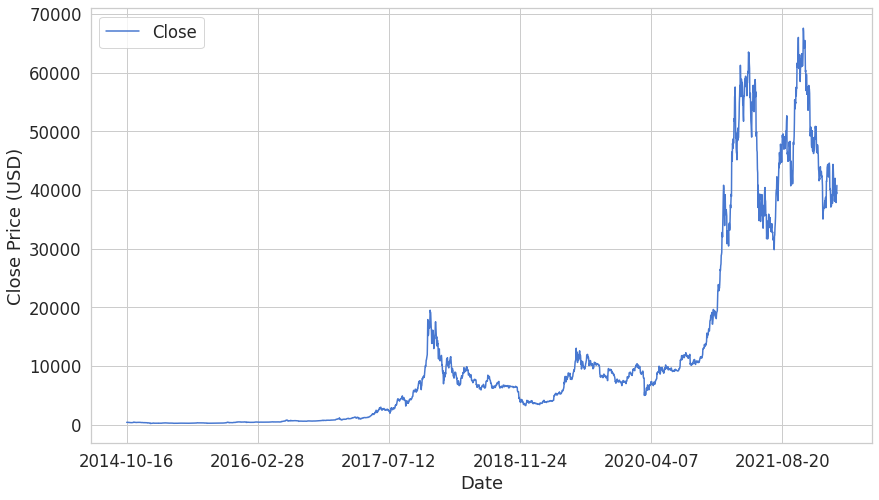

In [ ]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

In [ ]:
# NORMALIZATION

In [ ]:
scaler = MinMaxScaler()

close_price = df.Close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [ ]:
scaled_close.shape

(2709, 1)

In [ ]:
np.isnan(scaled_close).any()

False

In [ ]:
scaled_close = scaled_close[~np.isnan(scaled_close)]

In [ ]:
scaled_close = scaled_close.reshape(-1, 1)

In [ ]:
np.isnan(scaled_close).any()

False

In [ ]:
# PROCESSING

In [ ]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [ ]:
X_train.shape

(2478, 99, 1)

In [ ]:
X_train.shape

(2478, 99, 1)

In [ ]:
X_test.shape

(131, 99, 1)

In [ ]:
# MODEL

In [ ]:
# Reference
# bidLayer = Bidirectional(LSTM(10, return_sequences=True), input_shape=(5, 10))

In [ ]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

# Bidirectional = Bidirectional(layer=)
# forward_layer = LSTM(10, return_sequences=True)

model = keras.Sequential()

model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(WINDOW_SIZE, X_train.shape[-1])))

model.add(Dropout(rate=DROPOUT))

#model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))

#model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=False)))

model.add(Dense(units=1))

model.add(Activation('linear'))

NotImplementedError: ignored

In [ ]:
# TRAINING

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

In [ ]:
BATCH_SIZE = 64

history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
35/35 [==============================] - 6s 80ms/step - loss: 0.0092 - val_loss: 0.2650
Epoch 2/50
35/35 [==============================] - 2s 48ms/step - loss: 0.0139 - val_loss: 0.2218
Epoch 3/50
35/35 [==============================] - 2s 48ms/step - loss: 0.0082 - val_loss: 0.1566
Epoch 4/50
35/35 [==============================] - 2s 50ms/step - loss: 0.0070 - val_loss: 0.1111
Epoch 5/50
35/35 [==============================] - 2s 46ms/step - loss: 0.0058 - val_loss: 0.0780
Epoch 6/50
35/35 [==============================] - 2s 51ms/step - loss: 0.0050 - val_loss: 0.0568
Epoch 7/50
35/35 [==============================] - 2s 47ms/step - loss: 0.0044 - val_loss: 0.0476
Epoch 8/50
35/35 [==============================] - 2s 47ms/step - loss: 0.0042 - val_loss: 0.0474
Epoch 9/50
35/35 [==============================] - 2s 46ms/step - loss: 0.0042 - val_loss: 0.0505
Epoch 10/50
35/35 [==============================] - 2s 47ms/step - loss: 0.0042 - val_loss: 0.0533
Epoch 11/

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 9ms/step - loss: 0.0260


0.02595931850373745

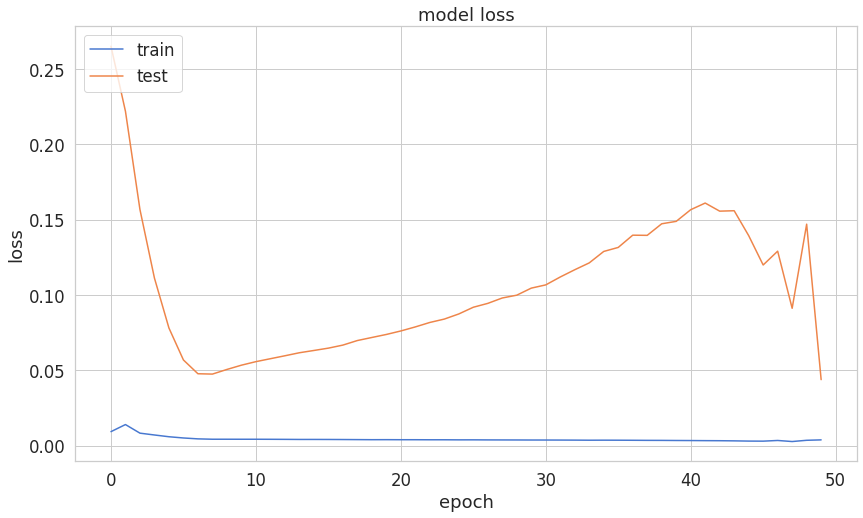

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# PREDICTION

In [ ]:
y_hat = model.predict(X_test)


#RESHAPING TO 2D ARRAY
#y_hat = model.predict(X_test)

nsamples, nx, ny = y_hat.shape
d2_train_dataset = y_hat.reshape((nsamples,nx*ny))


y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();